In [1]:
import matplotlib.pyplot as plt
import numpy as np

from superfv import EulerSolver, plot_1d_slice
from superfv.initial_conditions import sod_shock_tube_1d, shu_osher, toro1, toro2, toro3
from teyssier import cons_to_prim, riemann, weno

Sod Shock Tube

In [2]:
N = 100
p = 3

sim = EulerSolver(
    ic=sod_shock_tube_1d,
    bcx="free",
    nx=N,
    p=p,
    riemann_solver="hllct",
    flux_recipe=3,
    lazy_primitives=True,
    ZS=True,
    SED=True,
    PAD={"rho": (0, None), "P": (0, None)},
)
sim.run(0.245, allow_overshoot=True)

t, ut = weno(
    0.245,
    N,
    ic_type="sod test",
    bc_type="free",
    riemann_solver="hllc",
    time=p + 1,
    space=p + 1,
)
x = (np.arange(ut.shape[2]) + 0.5) / ut.shape[2]
wt = cons_to_prim(ut[-1, :, :])

Step #67 @ t=2.47e-01 | dt=3.63e-03 | min(rho)=1.25e-01, min(P)=1.00e-01 | (done)                   
cell= 100  itermax= 100000
Done  67 0.24739037389936655


In [3]:
# compute exact solution
xana = (np.arange(1024) + 0.5) / 1024
wana = np.zeros([3, 1024])
for i in range(0, np.size(xana)):
    s = (xana[i] - 0.5) / 0.245
    d, v, p = riemann.exact_solution(s, [1, 0, 1], [0.125, 0, 0.1])
    wana[:, i] = [d, v, p]

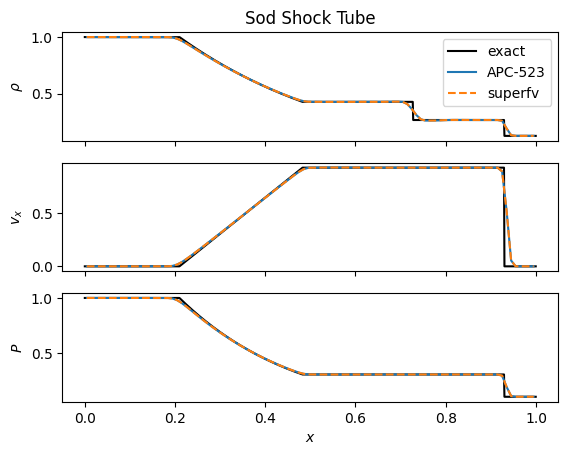

In [4]:
fig, axs = plt.subplots(3, 1, sharex=True)

axs[0].set_title("Sod Shock Tube")

axs[0].set_ylabel(r"$\rho$")
axs[1].set_ylabel(r"$v_x$")
axs[2].set_ylabel(r"$P$")

axs[0].plot(xana, wana[0, :], label="exact", color="k")
axs[0].plot(x, wt[0, :], label="APC-523")
plot_1d_slice(sim, axs[0], "rho", label="superfv", cell_averaged=True, linestyle="--")
axs[0].legend()

axs[1].plot(xana, wana[1, :], label="exact", color="k")
axs[1].plot(x, wt[1, :], label="APC-523")
plot_1d_slice(sim, axs[1], "vx", label="superfv", cell_averaged=True, linestyle="--")

axs[2].plot(xana, wana[2, :], label="exact", color="k")
axs[2].plot(x, wt[2, :], label="APC-523")
plot_1d_slice(
    sim, axs[2], "P", label="superfv", cell_averaged=True, linestyle="--", xlabel=True
)

Toro 1

In [5]:
N = 100
p = 3

sim = EulerSolver(
    ic=toro1,
    bcx="free",
    nx=N,
    p=p,
    riemann_solver="hllct",
    flux_recipe=3,
    lazy_primitives=True,
    ZS=True,
    SED=True,
    PAD={"rho": (0, None), "P": (0, None)},
)
sim.run(0.2, allow_overshoot=True)

t, ut = weno(
    0.2,
    N,
    ic_type="toro test1",
    bc_type="free",
    riemann_solver="hllc",
    time=p + 1,
    space=p + 1,
)
x = (np.arange(ut.shape[2]) + 0.5) / ut.shape[2]
wt = cons_to_prim(ut[-1, :, :])

Step #69 @ t=2.03e-01 | dt=2.89e-03 | min(rho)=1.25e-01, min(P)=1.00e-01 | (done)                   
cell= 100  itermax= 100000
Done  69 0.202692254439518


In [6]:
# compute exact solution
xana = (np.arange(1024) + 0.5) / 1024
wana = np.zeros([3, 1024])
for i in range(0, np.size(xana)):
    s = (xana[i] - 0.3) / 0.2
    d, v, p = riemann.exact_solution(s, [1, 0.75, 1], [0.125, 0, 0.1])
    wana[:, i] = [d, v, p]

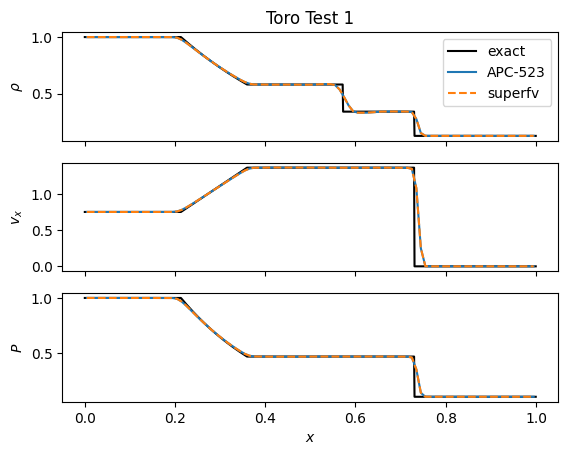

In [7]:
fig, axs = plt.subplots(3, 1, sharex=True)

axs[0].set_title("Toro Test 1")

axs[0].set_ylabel(r"$\rho$")
axs[1].set_ylabel(r"$v_x$")
axs[2].set_ylabel(r"$P$")

axs[0].plot(xana, wana[0, :], label="exact", color="k")
axs[0].plot(x, wt[0, :], label="APC-523")
plot_1d_slice(sim, axs[0], "rho", label="superfv", cell_averaged=True, linestyle="--")
axs[0].legend()

axs[1].plot(xana, wana[1, :], label="exact", color="k")
axs[1].plot(x, wt[1, :], label="APC-523")
plot_1d_slice(sim, axs[1], "vx", label="superfv", cell_averaged=True, linestyle="--")

axs[2].plot(xana, wana[2, :], label="exact", color="k")
axs[2].plot(x, wt[2, :], label="APC-523")
plot_1d_slice(
    sim, axs[2], "P", label="superfv", cell_averaged=True, linestyle="--", xlabel=True
)

Toro 2

In [8]:
N = 100
p = 3

sim = EulerSolver(
    ic=toro2,
    bcx="free",
    nx=N,
    p=p,
    riemann_solver="hllct",
    flux_recipe=3,
    lazy_primitives=True,
    ZS=True,
    SED=True,
    PAD={"rho": (0, None), "P": (0, None)},
)
sim.run(0.15, allow_overshoot=True)

t, ut = weno(
    0.15,
    N,
    ic_type="toro test2",
    bc_type="free",
    riemann_solver="hllc",
    time=p + 1,
    space=p + 1,
)
x = (np.arange(ut.shape[2]) + 0.5) / ut.shape[2]
wt = cons_to_prim(ut[-1, :, :])

Step #52 @ t=1.51e-01 | dt=2.91e-03 | min(rho)=2.88e-02, min(P)=3.54e-03 | (done)                   
cell= 100  itermax= 100000
Done  52 0.15133534965277817


In [9]:
# compute exact solution
xana = (np.arange(1024) + 0.5) / 1024
wana = np.zeros([3, 1024])
for i in range(0, np.size(xana)):
    s = (xana[i] - 0.5) / 0.15
    d, v, p = riemann.exact_solution(s, [1, -2, 0.4], [1, 2, 0.4])
    wana[:, i] = [d, v, p]

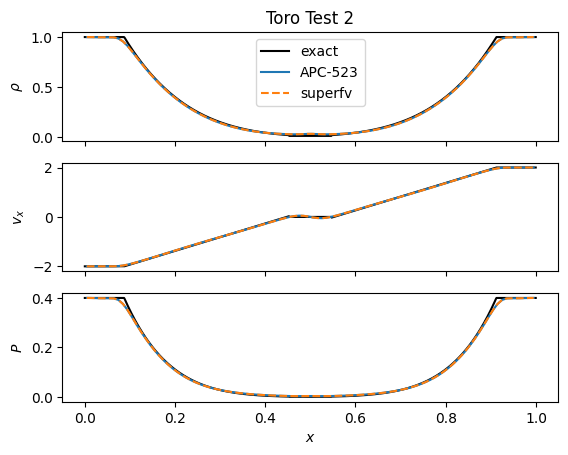

In [10]:
fig, axs = plt.subplots(3, 1, sharex=True)

axs[0].set_title("Toro Test 2")

axs[0].set_ylabel(r"$\rho$")
axs[1].set_ylabel(r"$v_x$")
axs[2].set_ylabel(r"$P$")

axs[0].plot(xana, wana[0, :], label="exact", color="k")
axs[0].plot(x, wt[0, :], label="APC-523")
plot_1d_slice(sim, axs[0], "rho", label="superfv", cell_averaged=True, linestyle="--")
axs[0].legend()

axs[1].plot(xana, wana[1, :], label="exact", color="k")
axs[1].plot(x, wt[1, :], label="APC-523")
plot_1d_slice(sim, axs[1], "vx", label="superfv", cell_averaged=True, linestyle="--")

axs[2].plot(xana, wana[2, :], label="exact", color="k")
axs[2].plot(x, wt[2, :], label="APC-523")
plot_1d_slice(
    sim, axs[2], "P", label="superfv", cell_averaged=True, linestyle="--", xlabel=True
)

Toro 3

In [11]:
N = 100
p = 3

sim = EulerSolver(
    ic=toro3,
    bcx="free",
    nx=N,
    p=p,
    riemann_solver="hllct",
    flux_recipe=3,
    lazy_primitives=True,
    ZS=True,
    SED=True,
    PAD={"rho": (0, None), "P": (0, None)},
)
sim.run(0.012, allow_overshoot=True)

t, ut = weno(
    0.012,
    N,
    ic_type="toro test3",
    bc_type="free",
    riemann_solver="hllc",
    time=p + 1,
    space=p + 1,
)
x = (np.arange(ut.shape[2]) + 0.5) / ut.shape[2]
wt = cons_to_prim(ut[-1, :, :])

Step #81 @ t=1.20e-02 | dt=1.48e-04 | min(rho)=5.57e-01, min(P)=1.00e-02 | (done)                   
cell= 100  itermax= 100000
Done  81 0.012034655141824021


In [12]:
# compute exact solution
xana = (np.arange(1024) + 0.5) / 1024
wana = np.zeros([3, 1024])
for i in range(0, np.size(xana)):
    s = (xana[i] - 0.5) / 0.012
    d, v, p = riemann.exact_solution(s, [1, 0, 1000], [1, 0, 0.01])
    wana[:, i] = [d, v, p]

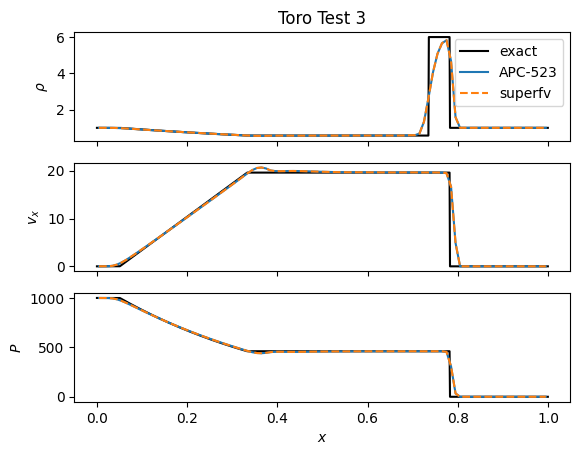

In [13]:
fig, axs = plt.subplots(3, 1, sharex=True)

axs[0].set_title("Toro Test 3")

axs[0].set_ylabel(r"$\rho$")
axs[1].set_ylabel(r"$v_x$")
axs[2].set_ylabel(r"$P$")

axs[0].plot(xana, wana[0, :], label="exact", color="k")
axs[0].plot(x, wt[0, :], label="APC-523")
plot_1d_slice(sim, axs[0], "rho", label="superfv", cell_averaged=True, linestyle="--")
axs[0].legend()

axs[1].plot(xana, wana[1, :], label="exact", color="k")
axs[1].plot(x, wt[1, :], label="APC-523")
plot_1d_slice(sim, axs[1], "vx", label="superfv", cell_averaged=True, linestyle="--")

axs[2].plot(xana, wana[2, :], label="exact", color="k")
axs[2].plot(x, wt[2, :], label="APC-523")
plot_1d_slice(
    sim, axs[2], "P", label="superfv", cell_averaged=True, linestyle="--", xlabel=True
)

Shu-Osher

In [14]:
N = 400
p = 3

sim = EulerSolver(
    ic=shu_osher,
    bcx="free",
    nx=N,
    p=p,
    riemann_solver="hllct",
    flux_recipe=3,
    lazy_primitives=True,
    ZS=True,
    SED=True,
    PAD={"rho": (0, None), "P": (0, None)},
)
sim.run(0.178, allow_overshoot=True)

t, ut = weno(
    0.178,
    N,
    ic_type="shu osher",
    bc_type="free",
    riemann_solver="hllc",
    time=p + 1,
    space=p + 1,
)
x = (np.arange(ut.shape[2]) + 0.5) / ut.shape[2]
wt = cons_to_prim(ut[-1, :, :])

Step #425 @ t=1.78e-01 | dt=4.16e-04 | min(rho)=8.00e-01, min(P)=1.00e+00 | (done)                  
cell= 400  itermax= 100000
Done  425 0.17835470969549863


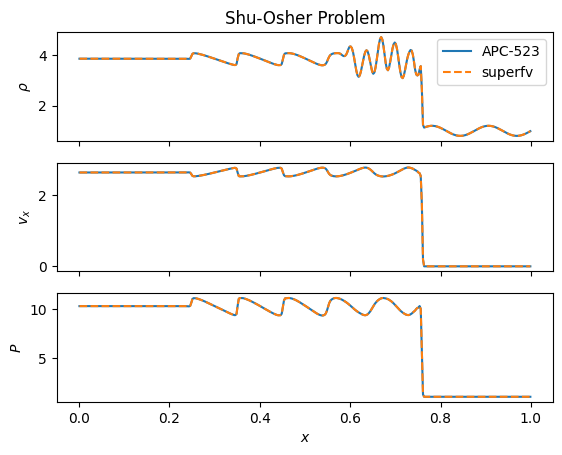

In [15]:
fig, axs = plt.subplots(3, 1, sharex=True)

axs[0].set_title("Shu-Osher Problem")

axs[0].set_ylabel(r"$\rho$")
axs[1].set_ylabel(r"$v_x$")
axs[2].set_ylabel(r"$P$")

axs[0].plot(x, wt[0, :], label="APC-523")
plot_1d_slice(sim, axs[0], "rho", label="superfv", cell_averaged=True, linestyle="--")
axs[0].legend()

axs[1].plot(x, wt[1, :], label="APC-523")
plot_1d_slice(sim, axs[1], "vx", label="superfv", cell_averaged=True, linestyle="--")

axs[2].plot(x, wt[2, :], label="APC-523")
plot_1d_slice(
    sim, axs[2], "P", label="superfv", cell_averaged=True, linestyle="--", xlabel=True
)